In [39]:
import matplotlib.pyplot as plt
import pandas as pd

In [40]:
#importamos la base de datos
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [41]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


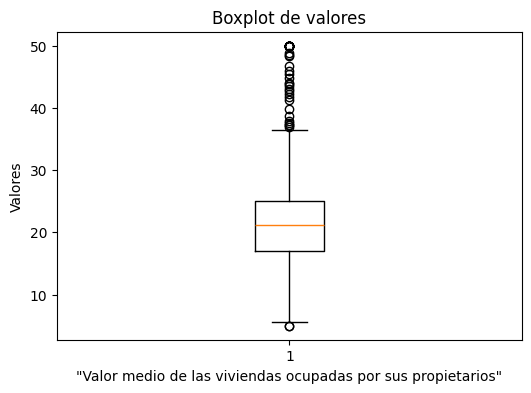

In [42]:

# Crear el boxplot
plt.figure(figsize=(6, 4))  # Ajustar el tamaño de la figura
plt.boxplot(boston_df['MEDV'])

# Agregar etiquetas y título
plt.xlabel('"Valor medio de las viviendas ocupadas por sus propietarios"')
plt.ylabel('Valores')
plt.title('Boxplot de valores')

# Mostrar el gráfico
plt.show()

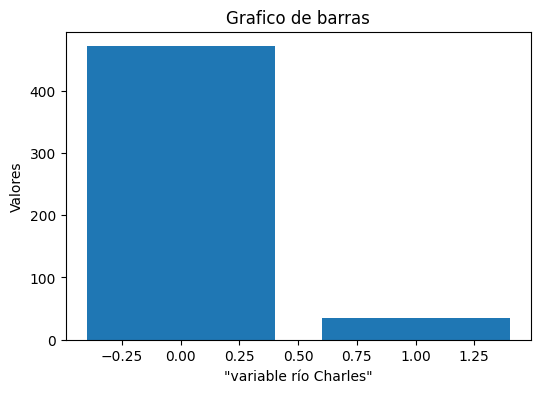

In [43]:
# Crear el boxplot

frec=boston_df['CHAS'].value_counts()
plt.figure(figsize=(6, 4))  # Ajustar el tamaño de la figura
plt.bar(frec.index,frec.values)

# Agregar etiquetas y título
plt.xlabel('"variable río Charles"')
plt.ylabel('Valores')
plt.title('Grafico de barras')

# Mostrar el gráfico
plt.show()

<Figure size 800x600 with 0 Axes>

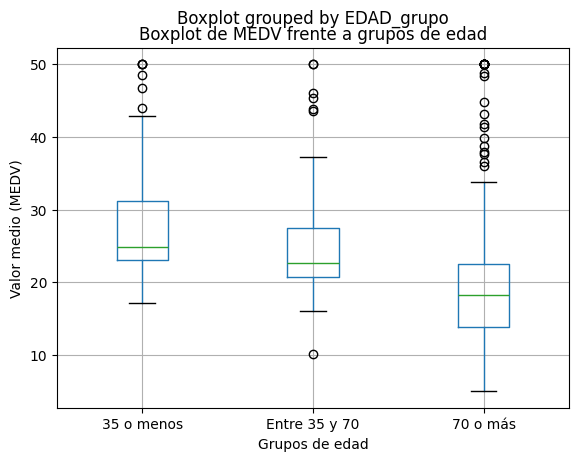

In [44]:

# Discretizar la variable EDAD en tres grupos
bins = [0, 35, 70, 120]  # Rango de edades
etiquetas = ['35 o menos', 'Entre 35 y 70', '70 o más']
boston_df['EDAD_grupo'] = pd.cut(boston_df['AGE'], bins=bins, labels=etiquetas)

# Crear el boxplot
plt.figure(figsize=(8, 6))
boston_df.boxplot(column='MEDV', by='EDAD_grupo')

# Agregar etiquetas y título
plt.xlabel('Grupos de edad')
plt.ylabel('Valor medio (MEDV)')
plt.title('Boxplot de MEDV frente a grupos de edad')

# Mostrar el gráfico
plt.show()

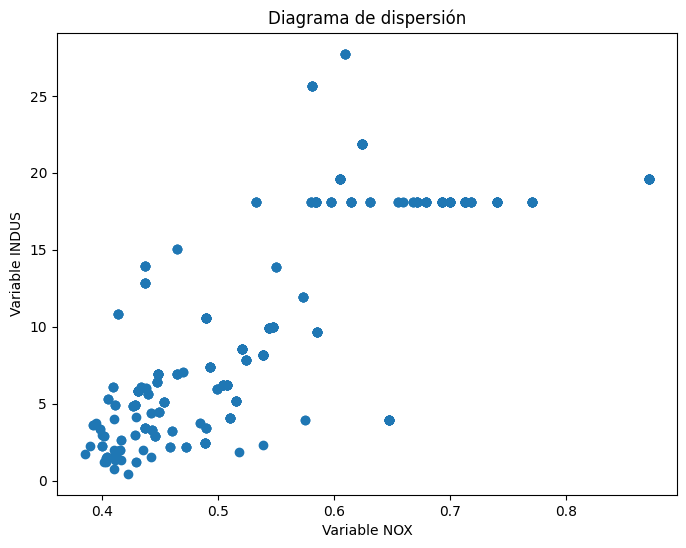

In [45]:

# Supongamos que tienes un DataFrame llamado 'boston_df' con las columnas 'variable1' y 'variable2'

# Crear el diagrama de dispersión
plt.figure(figsize=(8, 6))  # Ajustar el tamaño de la figura
plt.scatter(boston_df['NOX'], boston_df['INDUS'])

# Agregar etiquetas y título
plt.xlabel('Variable NOX')
plt.ylabel('Variable INDUS')
plt.title('Diagrama de dispersión')

# Mostrar el gráfico
plt.show()

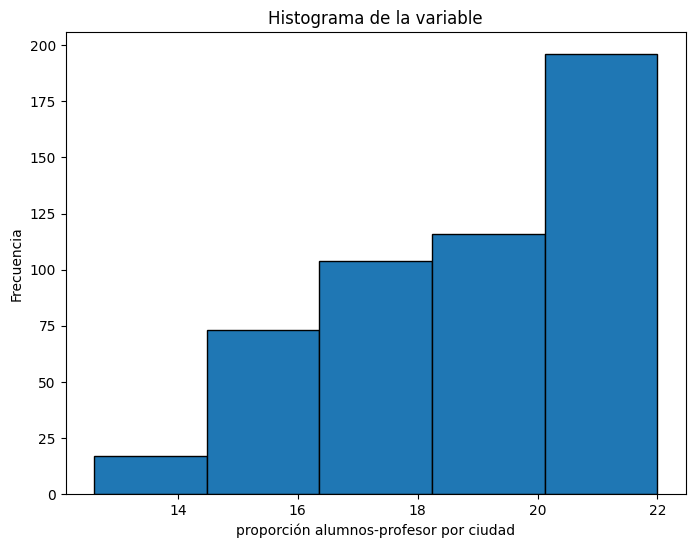

In [46]:

# Crear el histograma
plt.figure(figsize=(8, 6))  # Ajustar el tamaño de la figura
plt.hist(boston_df['PTRATIO'], bins=5, edgecolor='black')  # 'bins' define el número de barras

# Agregar etiquetas y título
plt.xlabel('proporción alumnos-profesor por ciudad')
plt.ylabel('Frecuencia')
plt.title('Histograma de la variable')

# Mostrar el gráfico
plt.show()

In [47]:

from scipy.stats import ttest_ind

# ¿Existe una diferencia significativa en el valor medio de las casas delimitadas por el río Charles o no? (Prueba T para muestras independientes)
# Separar los valores de MEDV según CHAS
medv_chas_1 = boston_df['MEDV'][boston_df['CHAS'] == 1]
medv_chas_0 = boston_df['MEDV'][boston_df['CHAS'] == 0]

# Realizar la prueba t de muestras independientes
t_stat, p_val = ttest_ind(medv_chas_1, medv_chas_0)

# Imprimir los resultados
print(f"Estadístico t: {t_stat:.4f}")
print(f"Valor p: {p_val:.4f}")

# Interpretación del valor p
if p_val < 0.05:
    print("Existe una diferencia significativa en el valor medio de las casas delimitadas por el río Charles.")
else:
    print("No existe una diferencia significativa en el valor medio de las casas delimitadas por el río Charles.")

Estadístico t: 3.9964
Valor p: 0.0001
Existe una diferencia significativa en el valor medio de las casas delimitadas por el río Charles.


In [48]:
# ¿Existe alguna diferencia en los valores medios de las casas (MEDV) para cada proporción de unidades ocupadas por sus propietarios construidas antes de 1940 (AGE)? (ANOVA)
from scipy.stats import f_oneway
# Agrupar los datos por AGE
grupos = boston_df.groupby('AGE')['MEDV']

# Obtener los valores de MEDV para cada grupo de AGE
grupo_medias = [valores for _, valores in grupos]

# Realizar el ANOVA
f_estadistico, p_valor = f_oneway(*grupo_medias)

# Imprimir los resultados
print(f"Estadístico F: {f_estadistico:.4f}")
print(f"Valor p: {p_valor:.4f}")

# Interpretación del valor p
if p_valor < 0.05:
    print("Existe una diferencia significativa en los valores medios de las casas (MEDV) para cada proporción de unidades ocupadas por sus propietarios construidas antes de 1940 (AGE).")
else:
    print("No existe una diferencia significativa en los valores medios de las casas (MEDV) para cada proporción de unidades ocupadas por sus propietarios construidas antes de 1940 (AGE).")

Estadístico F: 0.9840
Valor p: 0.5540
No existe una diferencia significativa en los valores medios de las casas (MEDV) para cada proporción de unidades ocupadas por sus propietarios construidas antes de 1940 (AGE).


In [49]:
#¿Podemos concluir que no existe relación entre las concentraciones de óxido nítrico y la proporción de acres comerciales no minoristas por ciudad? (Correlación de Pearson)
from scipy.stats import pearsonr
# Calcular el coeficiente de correlación de Pearson
corr_coef, p_valor = pearsonr(boston_df['NOX'], boston_df['INDUS'])

# Imprimir los resultados
print(f"Coeficiente de correlación de Pearson: {corr_coef:.4f}")
print(f"Valor p: {p_valor:.4f}")

# Interpretación del valor p
if p_valor < 0.05:
    print("Existe una correlación significativa entre las concentraciones de óxido nítrico (NOX) y la proporción de acres comerciales no minoristas por ciudad (INDUS).")
else:
    print("No existe una correlación significativa entre las concentraciones de óxido nítrico (NOX) y la proporción de acres comerciales no minoristas por ciudad (INDUS).")

Coeficiente de correlación de Pearson: 0.7637
Valor p: 0.0000
Existe una correlación significativa entre las concentraciones de óxido nítrico (NOX) y la proporción de acres comerciales no minoristas por ciudad (INDUS).
